In [73]:
# FLN
import geoplot as gplt
import geoplot.crs as gcrs
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [74]:
# Get data
# Note: Requires getting shape files from:
# https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html
path='cb_2018_us_state_20m/cb_2018_us_state_20m.shp'
states = gpd.read_file(path)
type(states)

geopandas.geodataframe.GeoDataFrame

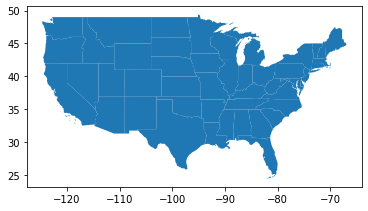

In [75]:
# Get the continential US and plot
contUS=states[~states['STUSPS'].isin(['AK', 'PR', 'HI'])]

contUS.plot()

In [22]:
#Create dataframes with states of interest
h=contUS[contUS['STUSPS'].isin(['PA', 'MA', 'CA'])]

visitedStates=['AL','CT', 'DE', 'DC', 'FL','GA','ID','LA','ME',\
              'MD','MS','NV','NJ', 'NY', 'NC','OR', 'RI','SC',\
              'VA', 'WA','WV','WY']
visited=contUS[contUS['STUSPS'].isin(visitedStates)]

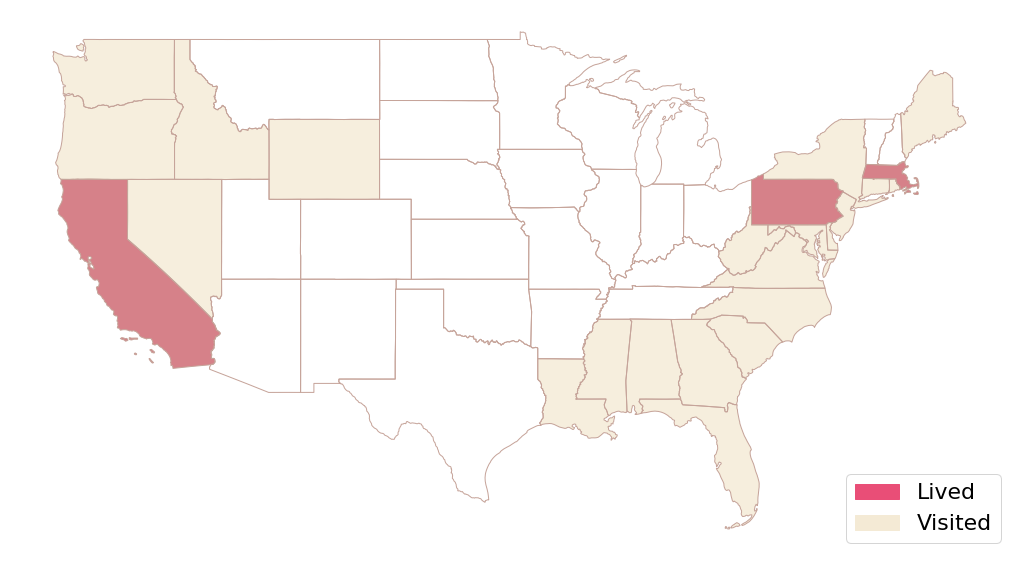

In [80]:
# Plot final map: US Map highlighting where I have lived

# Color scheme
c0='#E94E77' # dark pink
c1='#D68189' # light pink
c2='#C6A49A' # taupe
c3='#C6E5D9' # green-ish
c4='#F4EAD5' # pale

#Base Map
ax = contUS.boundary.plot(figsize=(18, 12), color=c2, linewidth=1)
ax.axis('off')

# Overlay maps
visited.plot(ax=ax, linewidth=0.25, facecolor=c4, alpha=0.8)
finalMap=h.plot(ax=ax, linewidth=0.25, facecolor=c1) 

# Create legend
l = mpatches.Patch(color=c0, label='Lived')
v = mpatches.Patch(color=c4, label='Visited')
plt.legend(handles=[l, v], fontsize=22, loc='lower right')

plt.show()

In [81]:
# Save figure
fig = finalMap.get_figure()
fig.tight_layout()
fig.savefig('map.png')